In [1]:
# prompt: install nltk library

!pip install nltk


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
amazon=pd.read_csv('amazon_alexa1.csv')
print(amazon)

       rating       date         variation  \
0           5  31-Jul-18  Charcoal Fabric    
1           5  31-Jul-18  Charcoal Fabric    
2           1  31-Jul-18    Walnut Finish    
3           5  31-Jul-18  Charcoal Fabric    
4           2  31-Jul-18  Charcoal Fabric    
...       ...        ...               ...   
3145        5  30-Jul-18        Black  Dot   
3146        2  30-Jul-18        Black  Dot   
3147        5  30-Jul-18        Black  Dot   
3148        2  30-Jul-18        White  Dot   
3149        4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                    

In [4]:
display(amazon)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,1,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,2,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,2,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,2,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    rating           3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.188254,0.944444
std,1.305309,0.229098
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
amazon.isnull().sum()

 rating             0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
cat_cols=amazon.select_dtypes('O')
num_cols=amazon.select_dtypes('int64')
print('Categorical Columns:')
print(cat_cols.columns)
print('Numerical Columns:')
print(num_cols.columns)

Categorical Columns:
Index(['date', 'variation', 'verified_reviews'], dtype='object')
Numerical Columns:
Index([' rating', 'feedback'], dtype='object')


In [9]:
print('VALUE COUNTS:')
print('-'*20)
print("Rating:")
print(amazon[' rating'].value_counts())
print('*'*20)
print('Variation:')
print(amazon['variation'].value_counts())
print('*'*20)
print('Feedback:')
print(amazon['feedback'].value_counts())

VALUE COUNTS:
--------------------
Rating:
5    2053
4     412
2     361
1     207
3     117
Name:  rating, dtype: int64
********************
Variation:
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64
********************
Feedback:
1    2975
0     175
Name: feedback, dtype: int64


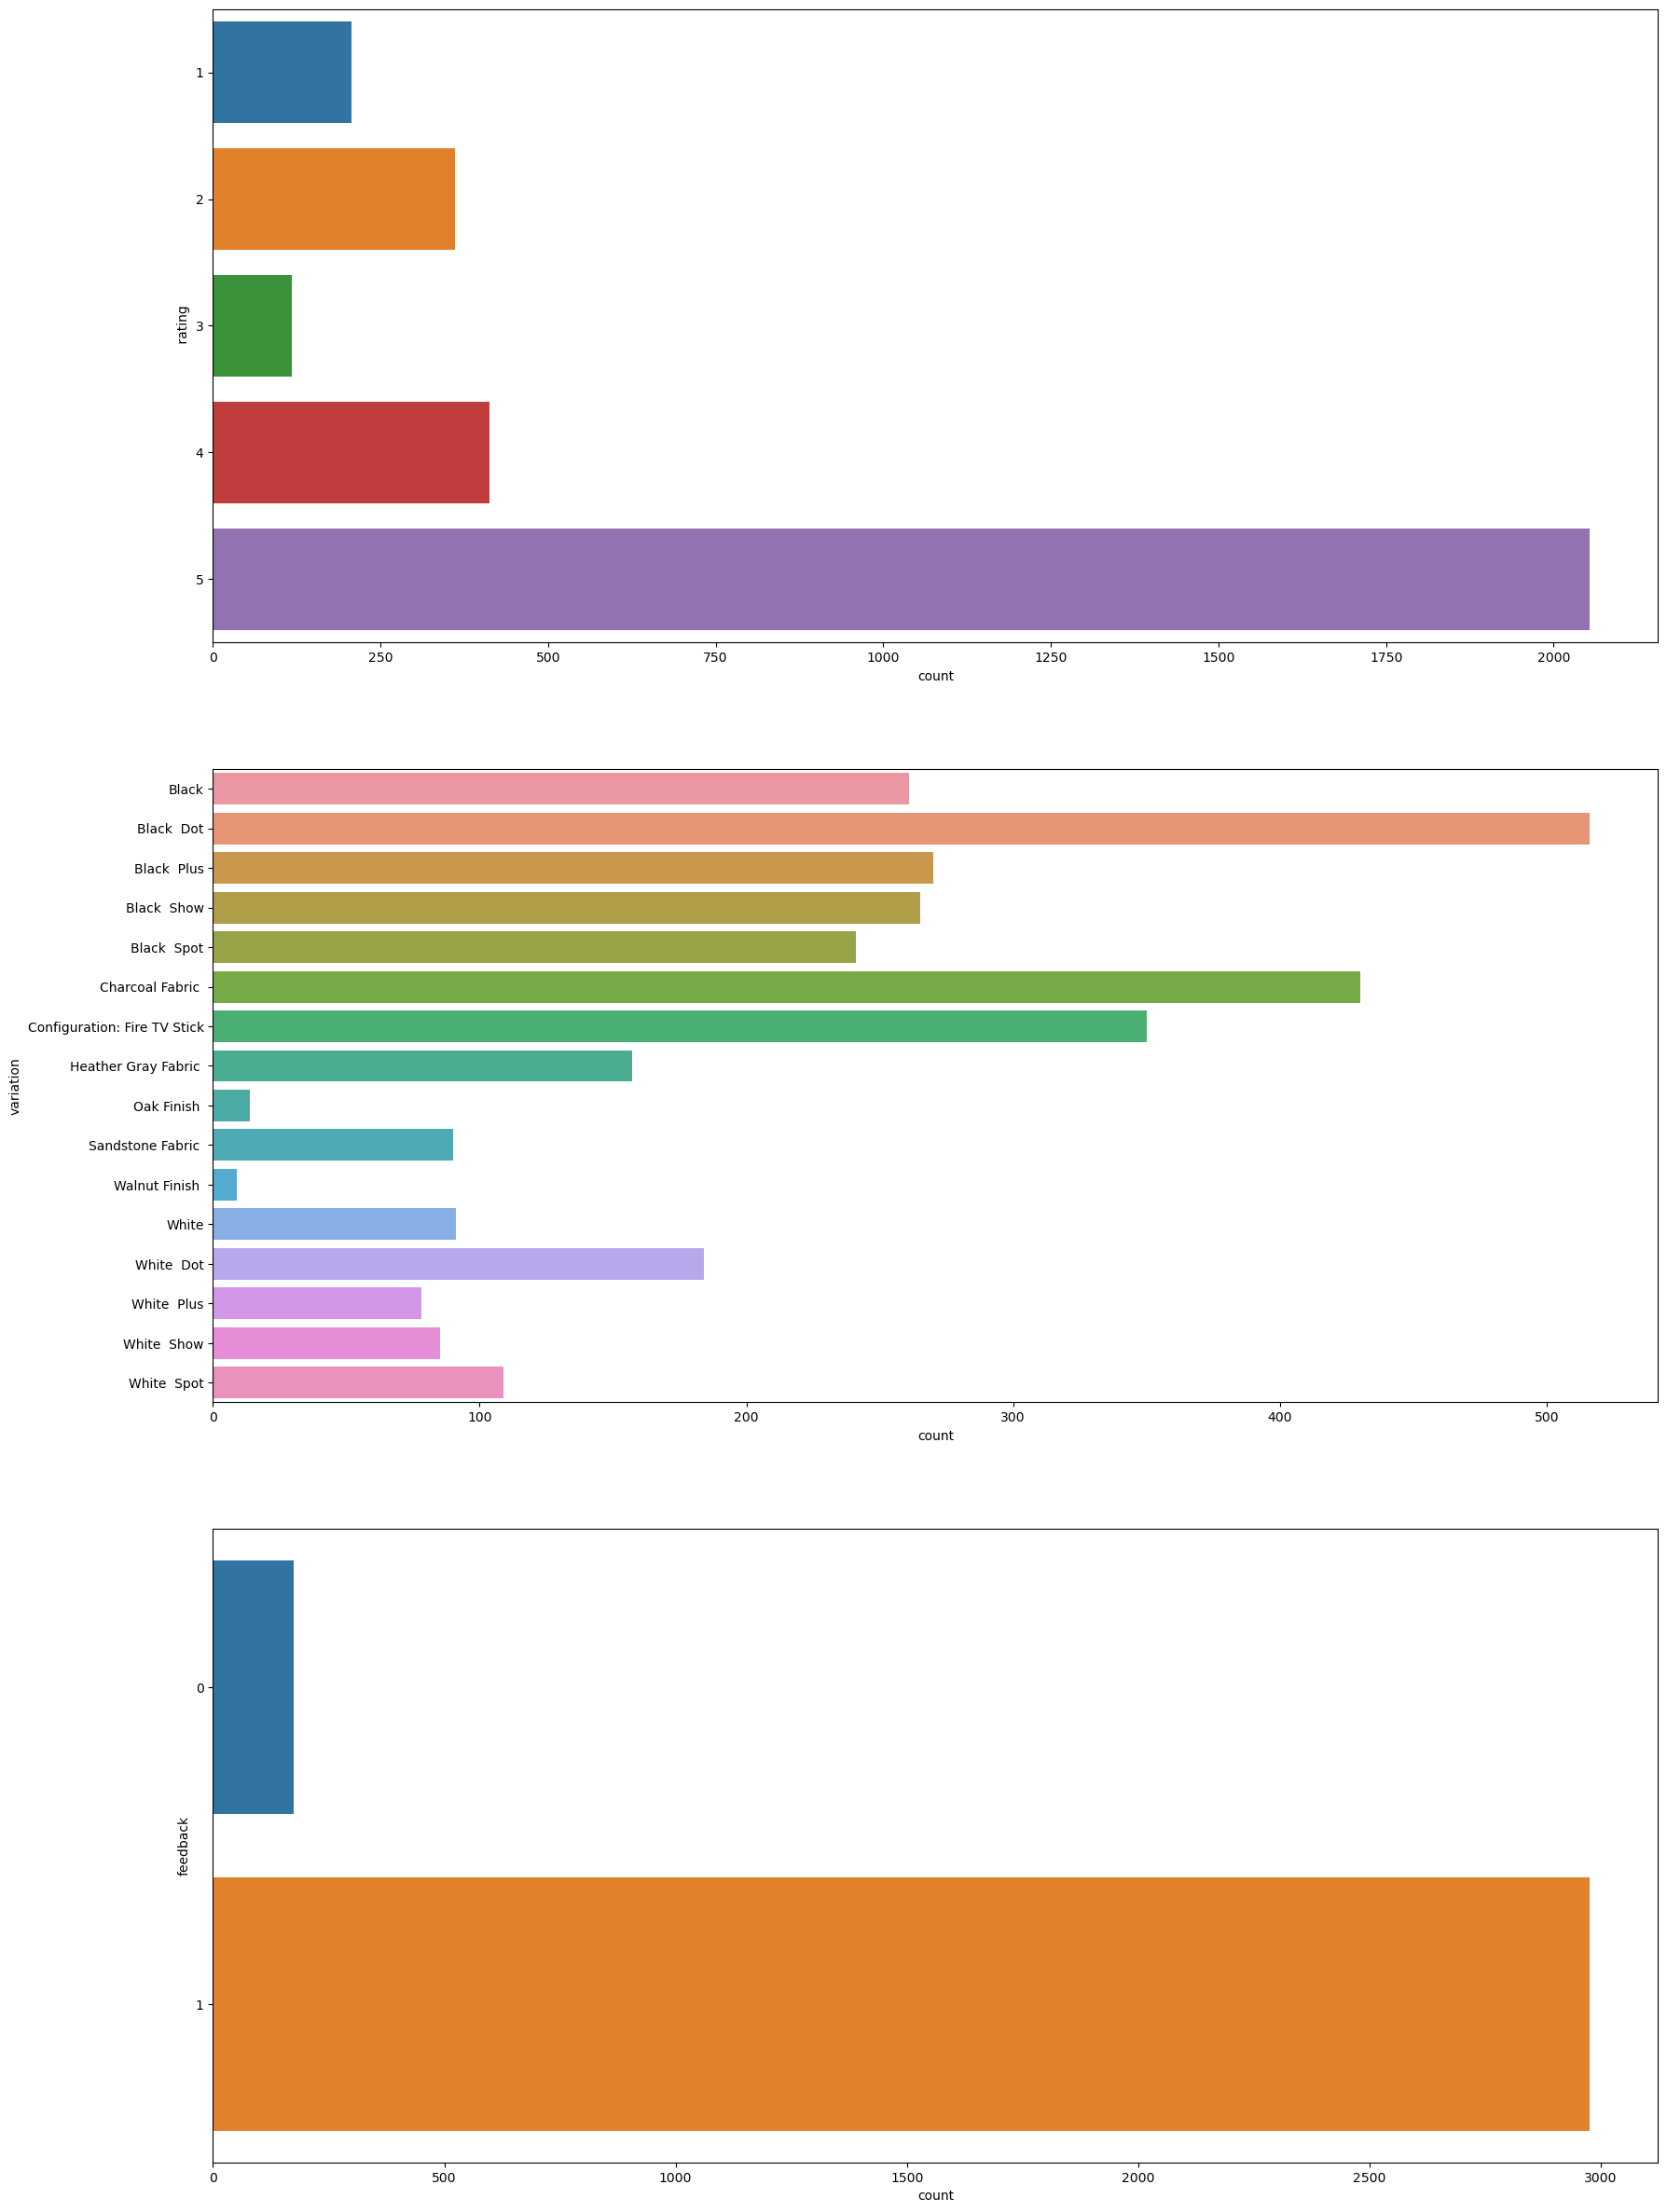

In [10]:
i=1
plt.figure(figsize=(20,30))
for c in [' rating','variation','feedback']:
    plt.subplot(3,1,i)
    sns.countplot(y=amazon[c].sort_values())
    i+=1

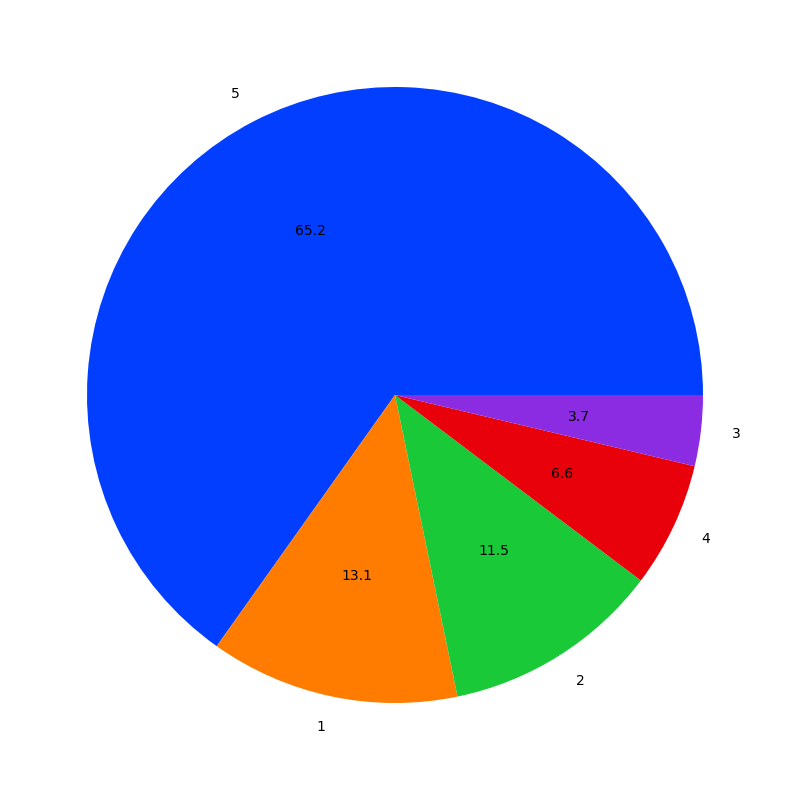

In [11]:
plt.figure(figsize=(10,10))
palette_color=sns.color_palette('bright')
plt.pie(amazon[' rating'].value_counts(),labels=list(amazon[' rating'].unique()),colors=palette_color,autopct='%1.1f')
plt.show()

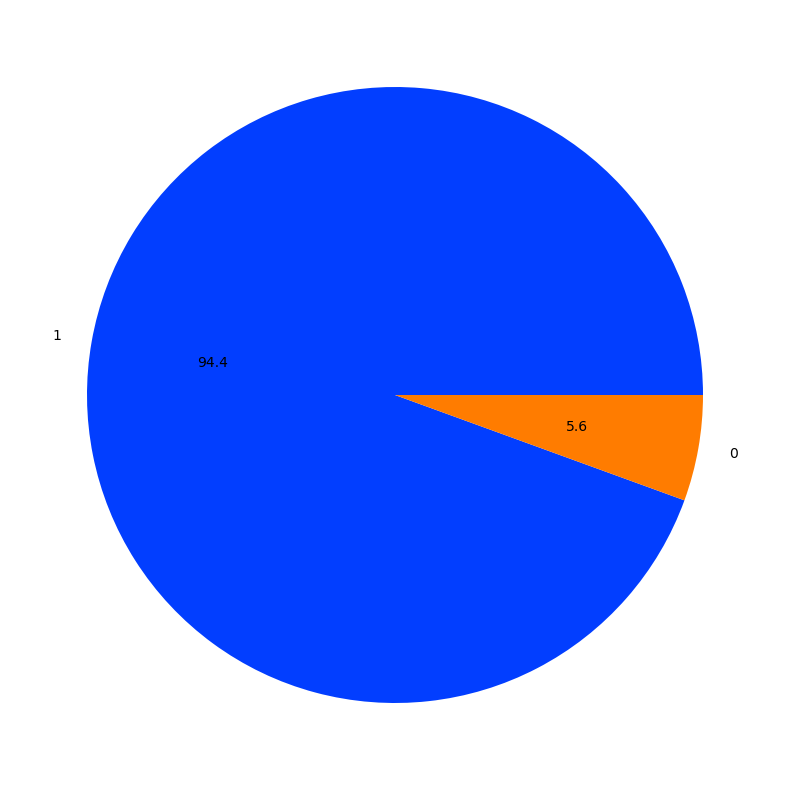

In [12]:
plt.figure(figsize=(10,10))
palette_color=sns.color_palette('bright')
plt.pie(amazon['feedback'].value_counts(),labels=list(amazon['feedback'].unique()),colors=palette_color,autopct='%1.1f')
plt.show()

In [13]:
import nltk
nltk.download('punkt')
def data_processing(text):
    text=text.lower()
    text=re.sub(r"https\S+www\S+|https\S+",'',text,flags=re.MULTILINE)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if w not in stopwords]
    return " ".join(filtered_text)
amazon['verified_reviews']=amazon['verified_reviews'].apply(data_processing)
amazon['verified_reviews']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   music
                              ...                        
3145                         perfect kids adults everyone
3146    listening music searching locations checking t...
3147    love things running entire home tv lights ther...
3148    complaint sound quality isnt great mostly use ...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [14]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data
amazon['verified_reviews']=amazon['verified_reviews'].apply(lambda x: stemming(x))
amazon['verified_reviews']

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   music
                              ...                        
3145                         perfect kids adults everyone
3146    listening music searching locations checking t...
3147    love things running entire home tv lights ther...
3148    complaint sound quality isnt great mostly use ...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

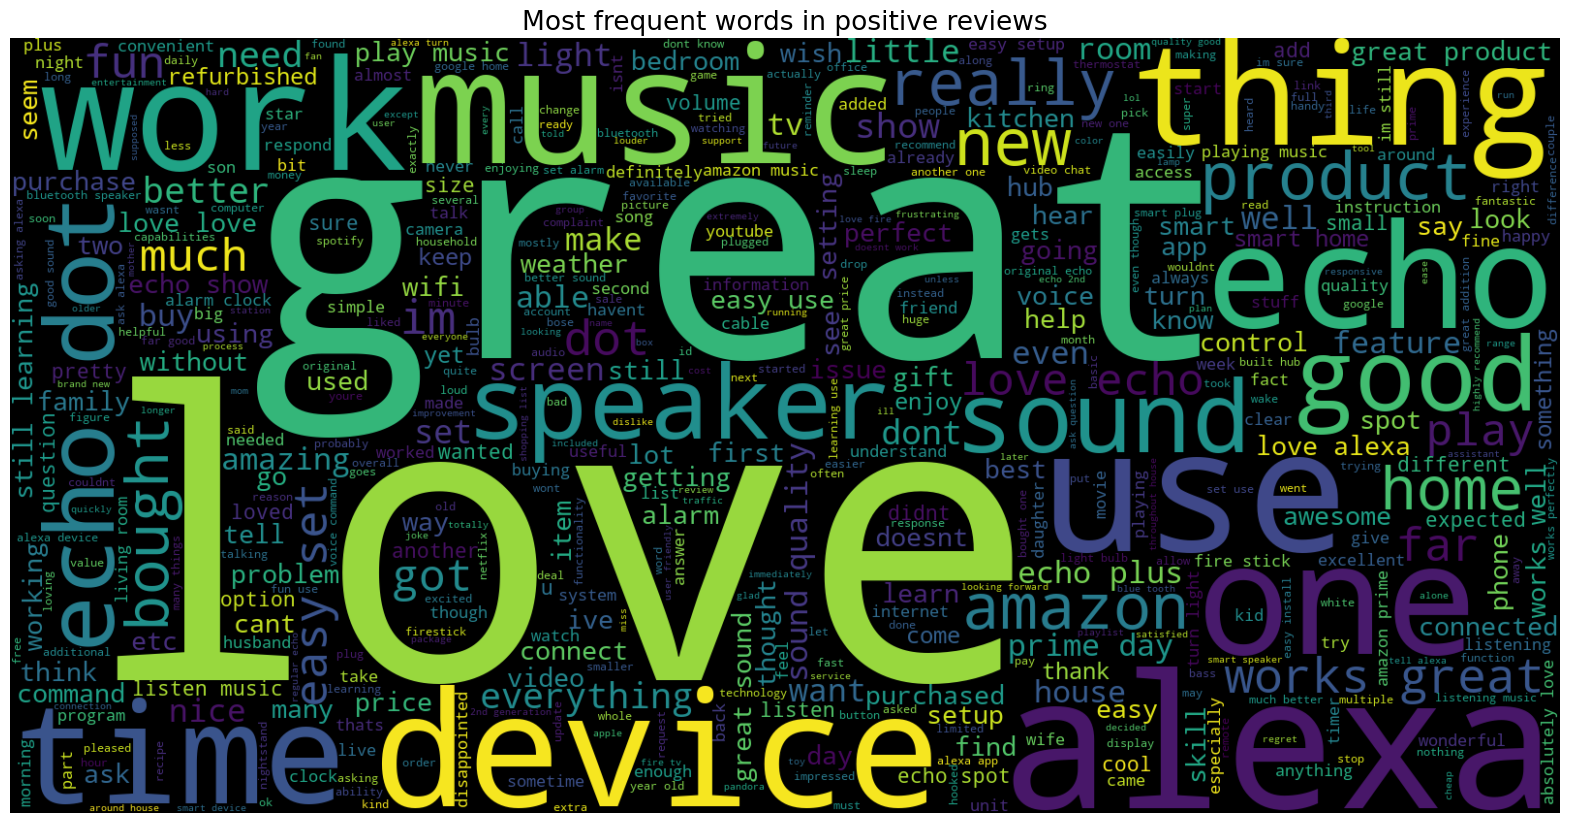

In [15]:
pos_reviews = amazon[amazon['feedback'] == 1]
text=' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize=19)
plt.show()

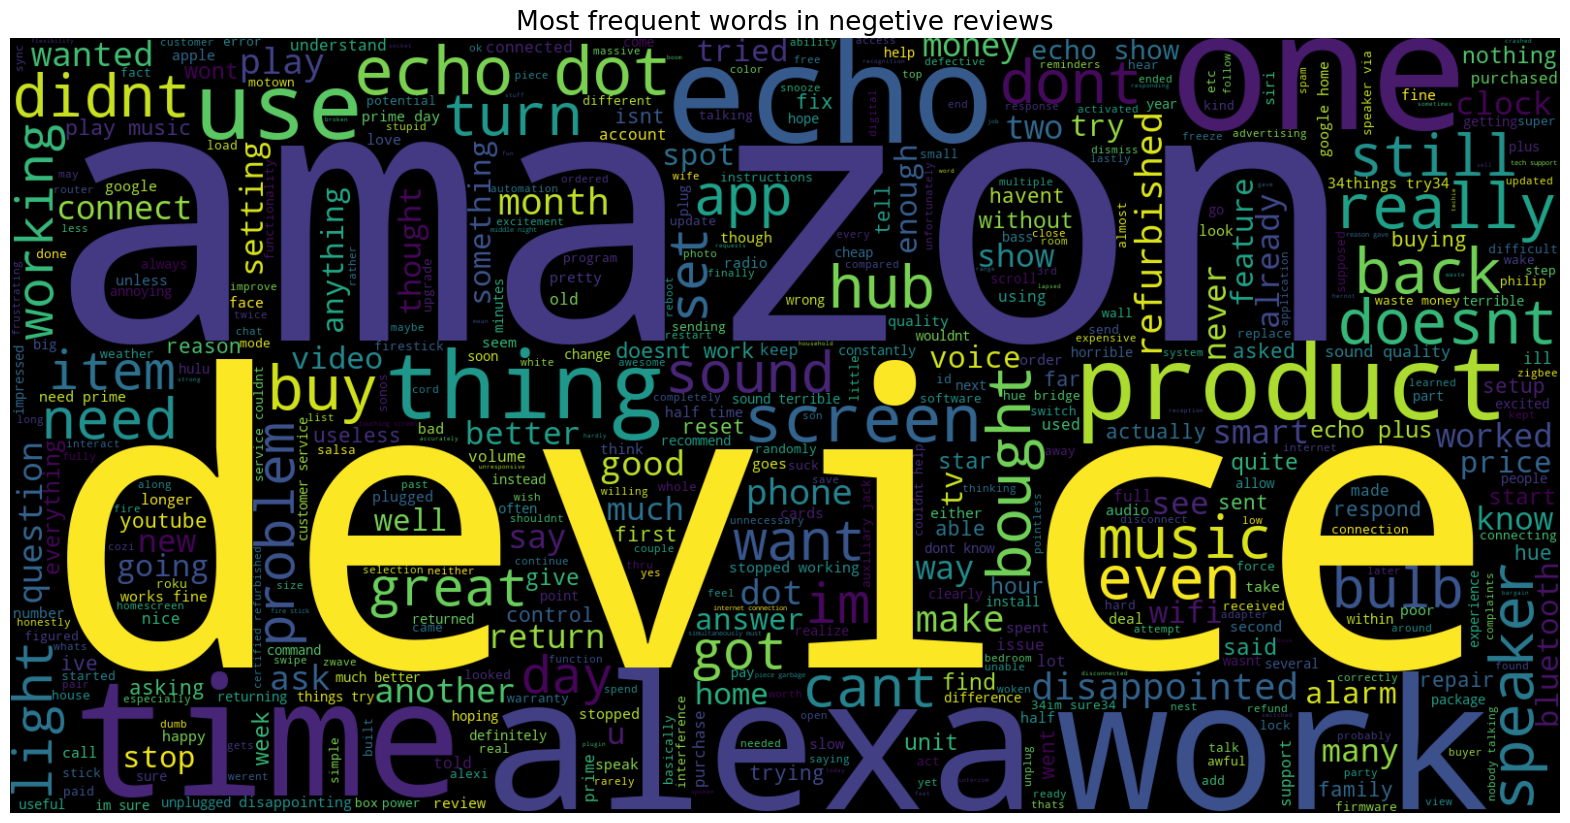

In [18]:
neg_reviews = amazon[amazon['feedback'] == 0]
text=' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15),facecolor=None)
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negetive reviews',fontsize=19)
plt.show()

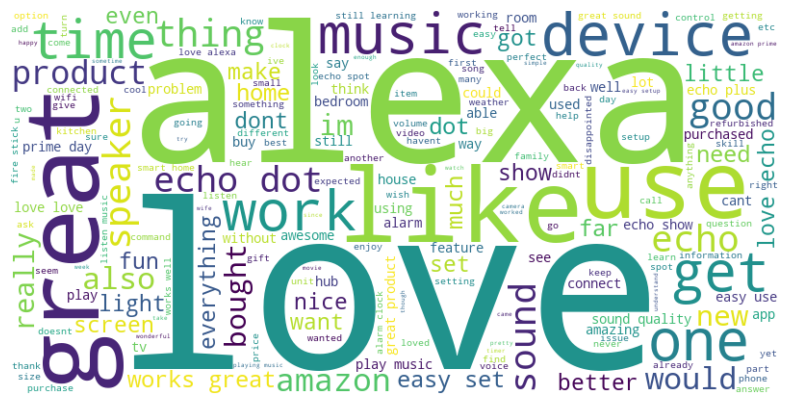

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text_data' is a column in the 'amazon' DataFrame containing textual information
text_data = amazon['verified_reviews'].astype(str)

# Joining all text data into a single string
all_text = ' '.join(text_data)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)

# Displaying the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
x=amazon['verified_reviews']
y=amazon['feedback']
cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=accuracy_score(rf_pred,y_test)
print('Test accuracy: {:.2f}%'.format(rf_acc*100))
a=rf_acc*100

Test accuracy: 96.51%


In [16]:
from sklearn.metrics import classification_report

# Assuming rf_pred and y_test are already defined
report = classification_report(y_test, rf_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        38
           1       0.96      1.00      0.98       592

    accuracy                           0.97       630
   macro avg       0.98      0.71      0.79       630
weighted avg       0.97      0.97      0.96       630



In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
b= logreg_acc*100

Test accuracy: 95.24%


In [18]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 11  27]
 [  3 589]]


              precision    recall  f1-score   support

           0       0.79      0.29      0.42        38
           1       0.96      0.99      0.98       592

    accuracy                           0.95       630
   macro avg       0.87      0.64      0.70       630
weighted avg       0.95      0.95      0.94       630



In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=accuracy_score(dt_pred,y_test)
print('Test accuracy: {:.2f}%'.format(dt_acc*100))
c=dt_acc*100

Test accuracy: 95.24%


In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_acc = accuracy_score(xgb_pred, y_test)
print("Test accuracy: {:.2f}%".format(xgb_acc*100))
print(confusion_matrix(y_test, xgb_pred))
print("\n")
print(classification_report(y_test, xgb_pred))
d=xgb_acc*100

Test accuracy: 95.40%
[[ 14  24]
 [  5 587]]


              precision    recall  f1-score   support

           0       0.74      0.37      0.49        38
           1       0.96      0.99      0.98       592

    accuracy                           0.95       630
   macro avg       0.85      0.68      0.73       630
weighted avg       0.95      0.95      0.95       630



In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
print("Test accuracy: {:.2f}%".format(svm_acc*100))
print(confusion_matrix(y_test, svm_pred))
print("\n")
print(classification_report(y_test, svm_pred))
e=svm_acc*100

Test accuracy: 94.44%
[[  3  35]
 [  0 592]]


              precision    recall  f1-score   support

           0       1.00      0.08      0.15        38
           1       0.94      1.00      0.97       592

    accuracy                           0.94       630
   macro avg       0.97      0.54      0.56       630
weighted avg       0.95      0.94      0.92       630



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
gb_acc = accuracy_score(gb_pred, y_test)
print("Test accuracy: {:.2f}%".format(gb_acc*100))
print(confusion_matrix(y_test, gb_pred))
print("\n")
print(classification_report(y_test, gb_pred))
f=gb_acc*100

Test accuracy: 94.29%
[[  2  36]
 [  0 592]]


              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.94      1.00      0.97       592

    accuracy                           0.94       630
   macro avg       0.97      0.53      0.54       630
weighted avg       0.95      0.94      0.92       630



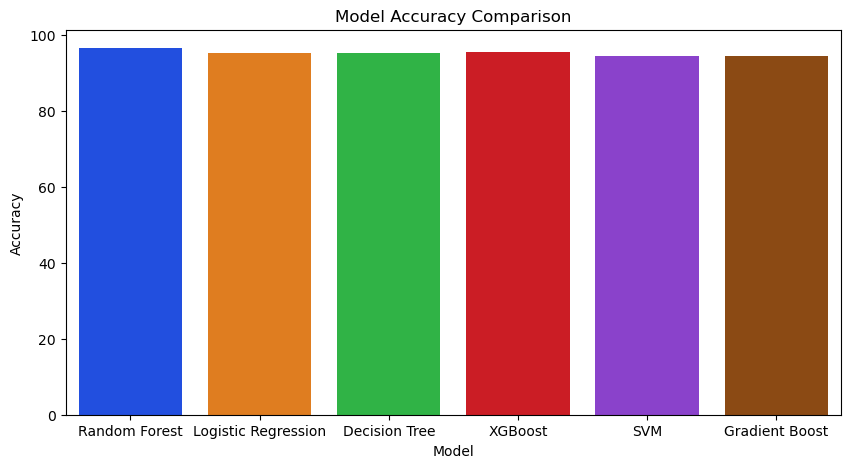

In [42]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Data for the bar graph

models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM', 'Gradient Boost']

accuracy = [a,b,c,d,e,f]

# Create the bar graph

plt.figure(figsize=(10, 5))

sns.barplot(x=models, y=accuracy, palette='bright')

# Set the title and labels

plt.title('Model Accuracy Comparison')

plt.xlabel('Model')

plt.ylabel('Accuracy')

# Rotate the x-axis labels

plt.xticks(rotation=0)

# Display the graph

plt.show()

Text(0, 0.5, 'Model')

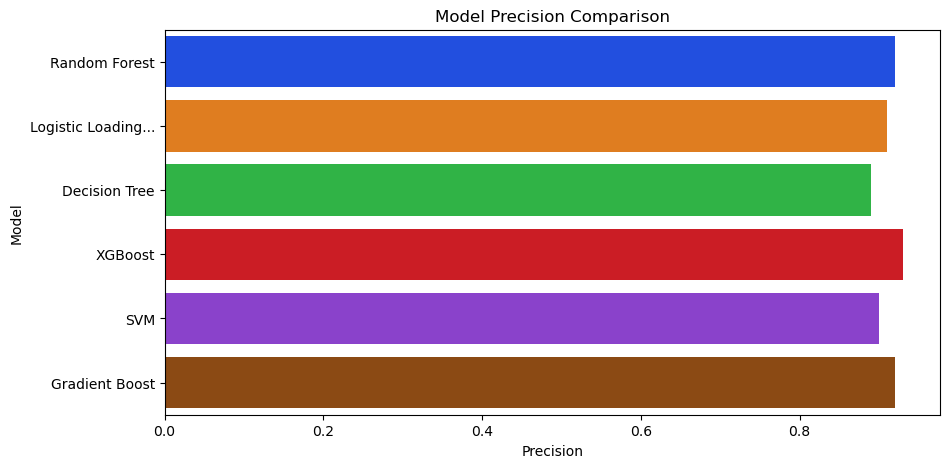

In [29]:


models = ['Random Forest', 'Logistic Loading...', 'Decision Tree', 'XGBoost', 'SVM', 'Gradient Boost']

precision = [0.92, 0.91, 0.89, 0.93, 0.90, 0.92]

# Create the bar graph

plt.figure(figsize=(10, 5))

sns.barplot(x=precision, y=models, palette='bright', orient='h')

# Set the title and labels

plt.title('Model Precision Comparison')

plt.xlabel('Precision')

plt.ylabel('Model')

# Display the graph

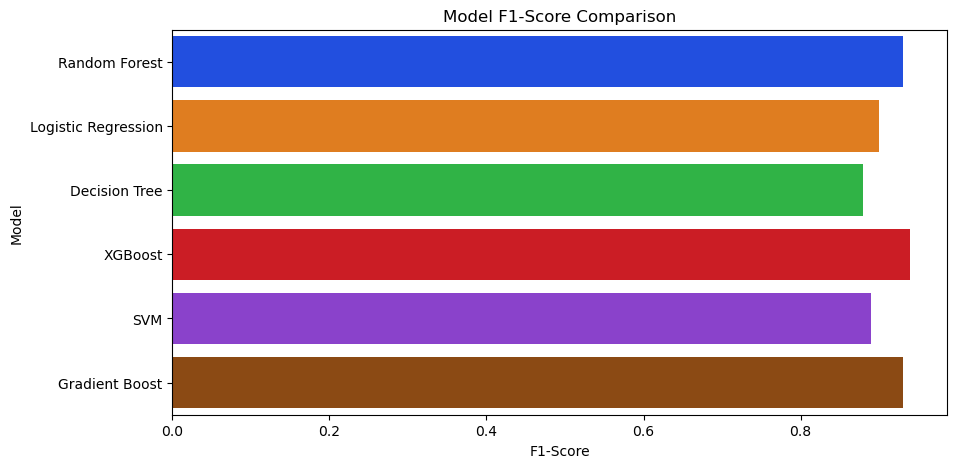

In [32]:


# Data for the bar graph

models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM', 'Gradient Boost'] 
f1_score = [0.93, 0.90, 0.88, 0.94, 0.89, 0.93]

# Create the bar graph

plt.figure(figsize=(10, 5))

sns.barplot(x=f1_score, y=models, palette='bright', orient='h')

# Set the title and labels

plt.title('Model F1-Score Comparison')

plt.xlabel('F1-Score')

plt.ylabel('Model')

# Display the graph

plt.show()

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Example dataset of text reviews
text_reviews = amazon['verified_reviews']

# Function to convert text reviews into ratings or feedback
def convert_to_rating(review):
    # Get sentiment scores for the review
    sentiment_scores = sid.polarity_scores(review)

    # Assign a numerical rating based on the compound sentiment score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Convert each text review into a rating
for review in text_reviews:
    rating = convert_to_rating(review)
    print(f"Review: {review}")
    print(f"Rating: {rating}")
    print()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


Review: love echo
Rating: Positive

Review: loved
Rating: Positive

Review: sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home
Rating: Positive

Review: lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well
Rating: Positive

Review: music
Rating: Neutral

Review: received echo gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else
Rating: Positive

Review: without cellphone use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet
Rating: Positive

Review: think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house
Rating: Positive

Review: looks great
Rating: Positive

Review: love ive listened son

In [32]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to convert sentiment scores to ratings
def convert_sentiment_to_rating(sentiment_score):
    if sentiment_score >= 0.5:
        return 5
    elif sentiment_score >= 0.3:
        return 4
    elif sentiment_score >= 0.1:
        return 3
    elif sentiment_score >= -0.1:
        return 2
    else:
        return 1

# Sample dataset of text reviews
reviews = amazon['verified_reviews']

# Convert text reviews to ratings
ratings = []
for review in reviews:
    sentiment_score = analyzer.polarity_scores(review)['compound']
    rating = convert_sentiment_to_rating(sentiment_score)
    ratings.append(rating)

# Print the converted ratings
for i, rating in enumerate(ratings):
    print(rating)


5
5
2
5
2
5
5
5
5
5
2
5
5
5
2
4
5
5
5
5
5
5
5
5
5
5
5
5
5
4
5
4
5
5
5
5
5
4
5
5
5
5
4
5
5
4
5
5
5
5
2
5
4
5
5
4
4
5
5
5
2
5
2
5
5
4
5
2
2
5
5
5
5
2
2
5
5
5
4
5
2
4
5
5
3
2
4
5
4
5
5
4
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
1
5
2
2
3
5
5
4
2
5
5
5
5
5
1
5
5
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
2
5
4
2
1
1
2
5
4
3
5
2
5
4
5
5
5
5
5
5
3
4
5
5
4
4
5
5
5
5
5
4
5
5
2
1
4
4
5
5
2
5
2
3
5
5
1
5
2
3
5
5
5
3
2
5
5
4
4
5
5
5
5
5
5
2
5
5
4
5
5
5
4
5
5
5
5
4
2
4
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
5
5
5
5
4
4
2
5
5
5
5
5
5
5
4
5
5
4
5
5
5
5
5
5
2
4
2
4
4
5
5
5
5
5
5
5
5
5
4
5
5
5
5
5
5
4
4
5
5
5
5
5
4
4
5
5
5
5
5
5
4
5
5
1
5
5
5
5
2
5
5
5
5
5
5
5
2
5
5
5
4
5
5
5
5
3
5
5
1
3
5
1
5
5
4
5
5
5
5
4
4
5
2
5
5
2
5
5
5
5
5
5
1
5
2
5
5
2
5
3
5
5
2
5
4
2
3
5
5
4
4
4
2
2
1
5
2
4
2
5
4
3
5
5
2
1
1
4
5
2
1
5
5
5
4
5
5
5
4
5
1
5
1
5
5
5
2
5
1
5
2
5
5
4
5
5
5
5
3
5
5
4
1
5
5
5
2
5
5
5
5
4
4
5
5
4
4
5
1
1
4
5
5
5
5
5
5
5
5
5
5
5
4
4
5
3
5
5
2
5
5
2
5
5
5
5
5
4
5
2
4
1
5
5
5
4
5
2
2
5
2
2
5
2
5
5
5
2
5
5
5
2
5
5
5
2
5
4
5
5
5
5
1
5


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to convert sentiment scores to binary feedback
def convert_sentiment_to_feedback(sentiment_score):
    if sentiment_score >= 0:
        return 1  # Positive feedback
    else:
        return 0  # Negative feedback

# Sample dataset of text reviews
reviews = amazon['verified_reviews']
# Convert text reviews to binary feedback
feedback = []
for review in reviews:
    sentiment_score = analyzer.polarity_scores(review)['compound']
    feedback_val = convert_sentiment_to_feedback(sentiment_score)
    feedback.append(feedback_val)

# Print the converted binary feedback
for i, fb in enumerate(feedback):
    print(fb)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1


In [35]:
x=amazon['verified_reviews']
y=amazon['feedback']
cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=accuracy_score(rf_pred,y_test)
print('Test accuracy: {:.2f}%'.format(rf_acc*100))

Test accuracy: 93.65%
